# **Secure analysis of a credit card dataset**

**Student**: <b>Developer:</b> DataSpieler12345

The purpose of this lab is to make a preliminary data analysis in a security area based on a credit card clients dataset with helping frameworks & libraries.

After completing this lab, you will be able to

1.  Explore the credit card clients dataset and calculate the main statistical indicators.
2.  Build different dependencies among the existing attributes of the dataset.
3.  Visualize the data analysis results with various plot types.


## Outline


*   Materials and Methods
*   General part
    *   Libraries Import
    *   Dataset Exploration
    *   Dataset Visualization
*   Tasks
*   Author


## Materials and Methods


The data that we are going to use for this is a subset of an open source default of a credit card clients dataset from the UCI ML repository: [https://archive.ics.uci.edu/ml/citation_policy.html](https://archive.ics.uci.edu/ml/citation_policy.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsPreliminary_data_analysis_dataset_L126905723-2022-01-01).

> This dataset is public available for research. The details are described in \[Yeh et al., 2009].

Please include this citation if you plan to use this database:
Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

During the work, the task of preliminary data analysis of clients' default payments is solved. In essence, the task is a matter of a security management area, where the results of preliminary data analysis of the estimated probability of default payments should be more helpful to prevent different dangerous states.

In this lab, we will try to give answers to a set of questions that may be relevant when analyzing credit card clients' data:

1.  What is the average age of all the clients?
2.  What part of clients out of the whole set has an issue with the default payment in the next month?
3.  How many clients are married and single?
4.  What are percent proportions for non-unique values of the variables?
5.  Which are the values with very high dependences among all the features based on the full correlation matrix?
6.  How can we identify new trends in a client's operations roadmap?
7.  How can we define the boundaries (where most data points are tightly concentrated) for the feature pairs?
8.  What is the share of clients in our DataFrame who are ready for their default payment next month?
9.  What are the mean values ​​of numerical features among the attracted clients (the average age of the clients and the average delay of their repayment status)?
10. What was the average repayment status in September 2005 for a typical client who was going to pay in the next month?
11. What part of clients paid duly in September 2005?

In addition, we will make a visualization of our dataset to plan security management actions more effectively.

[Pandas](http://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsPreliminary_data_analysis_dataset_L126905723-2022-01-01) is a Python library that provides extensive means for data analysis. Data scientists often work with data stored in table formats like .csv, .tsv, or .xlsx. Pandas makes it very convenient to load, process, and analyze such tabular data using SQL-like queries. In conjunction with Matplotlib and Seaborn, Pandas provides a wide range of opportunities for visual analysis of tabular data.


## Libraries Import


Import the libraries necessary for this lab. We can add some aliases (such as pd, plt, np, sns) to make the libraries easier to use in our code and set a default figure size for further plots. Ignore the warnings.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


%matplotlib inline
sns.set(style = "darkgrid")
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
config = pd.options.display # Create a new configuration object
config.precision = 3 # Sets the decimal precision to 3 in the object

## Dataset Exploration

In this section you will explore the sourse dataset.

Let's read the data and look at the first 7 rows using the `head` method. The number of the output rows from the dataset is determined by the `head` method parameter.


In [3]:
df = pd.read_excel('CreditCard.xls', header = 1, index_col = 0)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Let's look at the dataset size, feature names and their types


In [4]:
df.shape

(30000, 24)

The dataset contains `30 000` objects (rows), for each of which `24` features are set (columns), including 1 target feature (`default payment next month`).

### Attribute Information


Output the column (feature) names:


In [5]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

Input features (column names):

1.  `ID` - Client identification number (numeric).
2.  `LIMIT_BAL` - Amount of the given credit (NT dollar): it includes both an individual consumer's credit and their family (supplementary) credit (numeric).
3.  `SEX` - Gender (categorical: `1` = male; `2` = female).
4.  `EDUCATION` - Education (categorical: `1` = graduate school; `2` = university; `3` = high school; `4` = others).
5.  `MARRIGE` - Marital status (categorical: `1` = married; `2` = single; `3` = others).
6.  `AGE` - Age (year, numeric).
7.  `PAY_0` – `PAY_6` - History of past payment. We tracked the previous monthly payment records (from April to September, 2005) as follows: `PAY_0` = the repayment status in September, 2005; `PAY_1` = the repayment status in August, 2005; . . .; `PAY_6` = the repayment status in April, 2005. The measurement scale for the repayment status is: `-1` = paid duly; `1` = payment delay for one month; `2` = payment delay for two months; . . .; `8` = payment delay for eight months; `9` = payment delay for nine months and above.
8.  `BILL_AMT1` – `BILL_AMT6` - Amount of bill statement (NT dollar). `BILL_AMT1` = amount of bill statement in September, 2005; `BILL_AMT2` = amount of bill statement in August, 2005; . . .; `BILL_AMT6` = amount of bill statement in April, 2005.
9.  `PAY_AMT1` – `PAY_AMT6` - The amount of previous payment (NT dollar). `PAY_AMT1` = the amount paid in September, 2005; `PAY_AMT2` = the amount paid in August, 2005; . . .; `PAY_AMT6` = the amount paid in April, 2005.

Output feature (desired target):

10. `default payment next month` - a binary variable, default payment (binary: Yes = `1`, No = `0`), as the response variable.


To see general information on all the dataframe features (columns), we use the **`info`** method:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

As you can see, the dataset is full, no pass (`non-null`), so there is no need to fill the gaps. The dataset contains 24 integer (`int64`) features.


Method **`describe`** shows the main statistical characteristics of the dataset for each numerical feature (`int64` type): existing values number, mean, standard deviation, range, min & max, 0.25, 0.5 and 0.75 quartiles.


In [7]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,...,30000.000,30000.000,30000.000,30000.000,3.000e+04,30000.000,30000.000,30000.000,30000.000,30000.000
mean,167484.323,1.604,1.853,1.552,35.486,-0.017,-0.134,-0.166,-0.221,-0.266,...,43262.949,40311.401,38871.760,5663.581,5.921e+03,5225.681,4826.077,4799.388,5215.503,0.221
std,129747.662,0.489,0.790,0.522,9.218,1.124,1.197,1.197,1.169,1.133,...,64332.856,60797.156,59554.108,16563.280,2.304e+04,17606.961,15666.160,15278.306,17777.466,0.415
min,10000.000,1.000,0.000,0.000,21.000,-2.000,-2.000,-2.000,-2.000,-2.000,...,-170000.000,-81334.000,-339603.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000
25%,50000.000,1.000,1.000,1.000,28.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,2326.750,1763.000,1256.000,1000.000,8.330e+02,390.000,296.000,252.500,117.750,0.000
50%,140000.000,2.000,2.000,2.000,34.000,0.000,0.000,0.000,0.000,0.000,...,19052.000,18104.500,17071.000,2100.000,2.009e+03,1800.000,1500.000,1500.000,1500.000,0.000
75%,240000.000,2.000,2.000,2.000,41.000,0.000,0.000,0.000,0.000,0.000,...,54506.000,50190.500,49198.250,5006.000,5.000e+03,4505.000,4013.250,4031.500,4000.000,0.000
max,1000000.000,2.000,6.000,3.000,79.000,8.000,8.000,8.000,8.000,8.000,...,891586.000,927171.000,961664.000,873552.000,1.684e+06,896040.000,621000.000,426529.000,528666.000,1.000


The `Mean` row shows the feature average, `STD` is a RMS (Root Mean Square) deviation, `min`, `max` - minimum and maximum values, `25%`, `50%`, ` 75%  `- quarters that split the dataset (or part of it) into four groups containing approximately an equal number of observations (rows). For example, the age of about a quarter of all the clients  (`AGE`) is about 28.

In general, according to the data, it is impossible to say that there are outliers in the data. However, such an inspection is not enough, it is desirable to still see the charts of the target feature dependence from each input feature. We will do it later when we visualize features and dependencies.


For boolean features (type `bool` or via numerical values: `1` or `0`) you can use the **`value_counts`** method. Let's look at the target feature (`default payment next month`) distribution:

In [8]:
df["default payment next month"].value_counts(normalize = True)

0    0.779
1    0.221
Name: default payment next month, dtype: float64

77.9% of the clients out of 30 000 have an issue when the value of the variable `default payment next month` equals `0`.

Let's look at the client distribution by the variable `MARRIAGE`. Specify the value of the `normalize = True` parameter to view relative frequencies, but not absolute.


In [9]:
df["MARRIAGE"].value_counts(normalize = True)

2    0.532
1    0.455
3    0.011
0    0.002
Name: MARRIAGE, dtype: float64

As we can see, 45,5% (`0.455`) of the clients are married and 53,2% (`0.532`) are single, which must be taken into account when planning security campaigns to manage clients' operations.


### Counting the unique values


One of the stages of preliminary data analysis is counting unique values in the dataset which is presented now as a `DataFrame`. Here and further we will work with the `DataFrame`.

For this, firstly, we will count non-unique values, then we will define the columns for dropping based on values counting. Then, we will compare dimensionalities of our dataset after the dropping process and show a table with these indicators and their percent proportions.


In [10]:
from numpy import unique

counts = df.nunique() 
for_delete = [i for i,v in enumerate(counts) if v == 1]
if for_delete == []:
  print('Numbers of the useless columns are: empty (it means all our columns are useful).')
else:
  print('Numbers of the useless columns are:', for_delete)
df.drop(for_delete, axis = 1, inplace = True)
print('\nDimensionalities of our dataset after dropping are:', '\n', 'objects (clients) = ', '\t', '\t', df.shape[0],
      '\n', 'features (column names) = ', '\t', df.shape[1])
if (df.shape[0] == 30000) and (df.shape[1] == 24):
  print('\nThus, dimensionalities of our dataset after the dropping process have not changed.\n')
print("Numbers (Nr) of unique values (UV) for each column and its percent (%):\n")
print('Nr \t UV \t %')
print('======================')
for i in range(df.shape[1]):
    num = len(unique(df.iloc[:, i]))
    percentage = float(num) / df.shape[0] * 100
    print('%d\t %d\t %.1f' % (i, num, percentage))
print('======================')

Numbers of the useless columns are: empty (it means all our columns are useful).

Dimensionalities of our dataset after dropping are: 
 objects (clients) =  	 	 30000 
 features (column names) =  	 24

Thus, dimensionalities of our dataset after the dropping process have not changed.

Numbers (Nr) of unique values (UV) for each column and its percent (%):

Nr 	 UV 	 %
0	 81	 0.3
1	 2	 0.0
2	 7	 0.0
3	 4	 0.0
4	 56	 0.2
5	 11	 0.0
6	 11	 0.0
7	 11	 0.0
8	 11	 0.0
9	 10	 0.0
10	 10	 0.0
11	 22723	 75.7
12	 22346	 74.5
13	 22026	 73.4
14	 21548	 71.8
15	 21010	 70.0
16	 20604	 68.7
17	 7943	 26.5
18	 7899	 26.3
19	 7518	 25.1
20	 6937	 23.1
21	 6897	 23.0
22	 6939	 23.1
23	 2	 0.0


One way to quantify the relationship between variables pairs in the `DataFrame` is to use the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsPreliminary_data_analysis_dataset_L126905723-2022-01-01) which is a measure of the linear association between variables pairs (each with each). It takes on a value between -1 and 1, where:

**-1 indicates a perfect negative linear correlation**

**0 indicates no linear correlation**

**1 indicates a perfect positive linear correlation**

The higher the correlation coefficient is from zero, the stronger the relationship between the two variables is. But, in some cases, we would want to understand the correlation between more than just one pair of variables. In these cases, we can create a `correlation matrix` which is a square table that shows the correlation coefficients between all pairwise combinations of variables.


In [11]:
df.corr().style.background_gradient(cmap = 'BrBG')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.206684,0.226913,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


We can see (with positive values) very high dependences among `PAY_x` features based on the full correlation matrix shown above. For instance, the coefficient correlation is equal to `0.817` between `PAY_5` and `PAY_6`. These positive high correlations between the pairs of variables confirm that these variables are strong and likely important in our dataset. Also, for a positive increase in one variable, there is also a positive increase in the second variable. If the correlation between two variables is about 0 (for instance, the coefficient correlation is equal to `0.082` between `PAY_6` and `EDUCATION`), there is no linear relationship between them.

Working with quite big tables or matrices (DataFrames) isn't easy, so sometimes we have to decrease the size of a table by using necessary columns only. You need to indicate the names of the necessary columns or convert these names to a separate list (by `tolist()` method) as well as indicate a range of column numbers. For instance, if we only need the first five columns (`[0:6]`):


In [12]:
df_example = pd.DataFrame(df, columns=df.columns.tolist()[0:6])
df_example.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0
ID,,,,,,
1,20000,2,2,1,24,2
2,120000,2,2,2,26,-1
3,90000,2,2,2,34,0
4,50000,2,2,1,37,0
5,50000,1,2,1,57,-1


Let's decrease our dataset based on unique values defined earlier and use only values which are higher or equal 20%.

In [13]:
df_unique = pd.DataFrame(df, columns = df.columns.tolist()[11:23])
df_unique.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,
1,3913,3102,689,0,0,0,0,689,0,0,0,0
2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


Text(0.5, 1.0, 'Correlation Matrix\n\n')

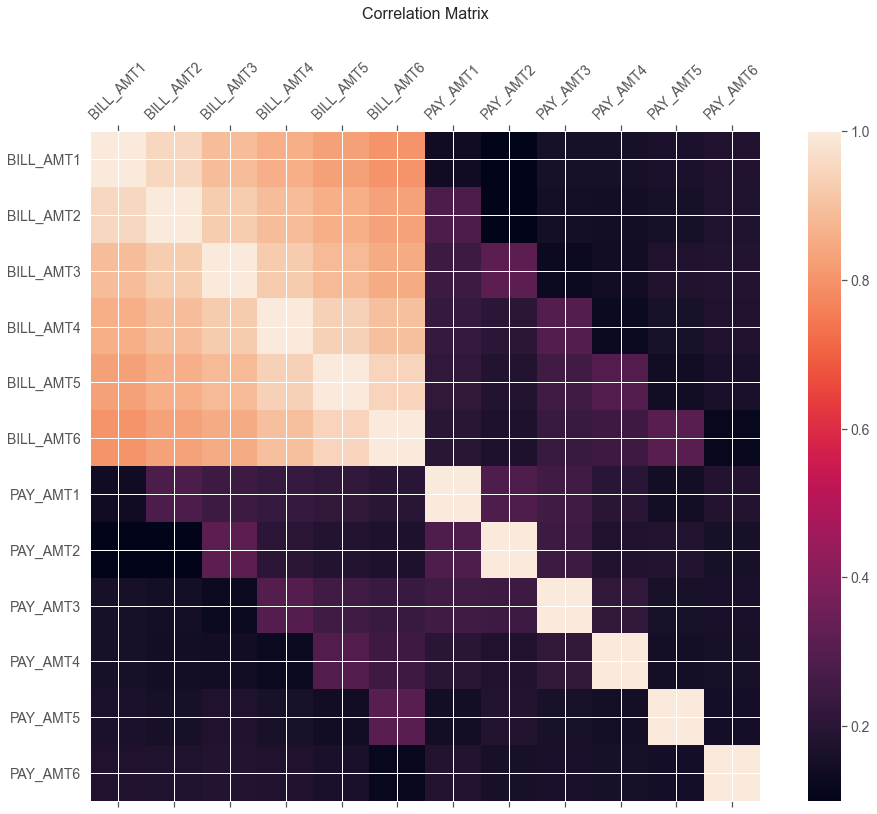

In [14]:
f = plt.figure(figsize=(17, 12))
plt.matshow(df_unique.corr(), fignum=f.number)
plt.xticks(range(df_unique.shape[1]), df_unique.columns, fontsize=14, rotation=45)
plt.yticks(range(df_unique.shape[1]), df_unique.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix\n\n', fontsize=16)

As you can see, the `very light area` (with positive values) confirms quite high dependences among `BILL_AMTx` features (for instance, coefficient correlation is equal to `0.946` between `BILL_AMT6` and `BILL_AMT5`). In addition, security specialists can use changes in correlation statistics to identify new trends in a client's operations roadmap.


### Studying separate dependencies of variables pairs

We can build subsets of variables pairs, which can show us their distribution and direct dependencies. For this, as it was shown before, you should perform the same operations by analogy with `tolist()` method, but only for two variables (features). For instance, let's create a new DataFrame which consists of two variables: `AGE` and `LIMIT_BAL`.

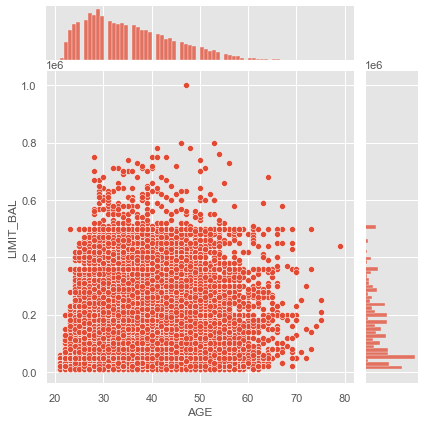

In [15]:
df_ALB = pd.DataFrame(df, columns=['LIMIT_BAL','AGE'])
sns.jointplot(x='AGE', y='LIMIT_BAL', data = df_ALB)

As we can see, most of the data points are tightly concentrated in the area with boundaries (on average) between `25` and `60` years, and in a range of amount of the given credit before `0.5 NT dollars`. This conclusion can be used as a factor of close attention to this risk group from a security specialist's side.


Let's try to define the boundaries (where the most data points are tightly concentrated) for the next two features: `PAY_AMT5` and `LIMIT_BAL` and the appropriate DataFrame `df_LBP`.

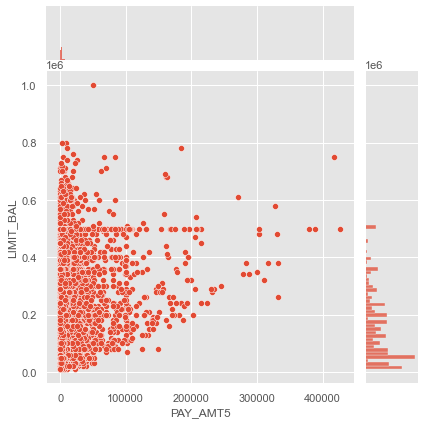

In [16]:
df_LBP = pd.DataFrame(df, columns=['LIMIT_BAL','PAY_AMT5'])
sns.jointplot(x='PAY_AMT5', y='LIMIT_BAL', data = df_LBP)

### Indexing and extracting data

A `DataFrame` can be indexed in many ways. In this regard, consider various ways of indexing and extracting data from the DataFrame with simple question examples.

To extract a separate column, you can use the code `dataframe ['name']`. We use this to answer the question: **What is the share of clients in our DataFrame, who are ready with their default payment in the next month?**

In [17]:
print("Part of clients =", '{:.2%}'.format(df["default payment next month"].mean()))

Part of clients = 22.12%


`22,12%` is not a good enough indicator for an organization, a business can be broken with such a percentage of credit repayment (every fifth client). The main task of the security department, in this case, is to avoid this state and prevent it in the future.


Logical indexation by one column of a `DataFrame` is very convenient. It looks like this: `df [p(df['Name']]`, where`  p ` is a certain logical condition that is checked for each element of the `Name` column. The result of such an indexation is a `DataFrame` consisting only of the rows satisfying the condition `p` by the `Name` column.

We use this to answer the question: **What are the mean values ​​of the numerical features among the attracted clients?**


In [18]:
df[df["default payment next month"] == 1].mean()

LIMIT_BAL                     130109.656
SEX                                1.567
EDUCATION                          1.895
MARRIAGE                           1.528
AGE                               35.726
PAY_0                              0.668
PAY_2                              0.458
PAY_3                              0.362
PAY_4                              0.255
PAY_5                              0.168
PAY_6                              0.112
BILL_AMT1                      48509.162
BILL_AMT2                      47283.618
BILL_AMT3                      45181.599
BILL_AMT4                      42036.951
BILL_AMT5                      39540.190
BILL_AMT6                      38271.436
PAY_AMT1                        3397.044
PAY_AMT2                        3388.650
PAY_AMT3                        3367.352
PAY_AMT4                        3155.627
PAY_AMT5                        3219.140
PAY_AMT6                        3441.482
default payment next month         1.000
dtype: float64

Thus, the average age of a typical client is about 35 years (`age` = 35.726), at the same time, their repayment status has been improved during half a year (based on the values of the variables `PAY_0`-`PAY_6`) and they paid with a delay from several weeks (`PAY_0` = `0.668`) to several days (`PAY_6` = `0.112`).


Combining previous two types of indexation, we will answer the question: **What was the average repayment status (`ars`) in September 2005 for a typical client who was going to pay in the next month**?


In [19]:
ars = round(df[df["default payment next month"] == 1]["PAY_2"].mean(), 2) * 100
print("Average repayment status, which was in September, 2005 for the typical client =", ars, "%")

Average repayment status, which was in September, 2005 for the typical client = 46.0 %


So, the average repayment status for September, 2005, for a typical client is 46%, it is almost a half of all the clients, which is not bad.


**What part of the clients (`default payment next month` == `1`) had paid duly (`PAY_0` == `-1`) in September, 2005?**


In [20]:
pd = round(((df["default payment next month"] == 1).sum() & df["PAY_0"].value_counts()[-1]) / df.shape[0], 3)*100
print("Part of clients =", pd, "%")

Part of clients = 13.8 %


So, the part of the cliens who had paid duly in September, 2005, is 13,8%. We cannot make a right conclusion about the current security policy based on this indicator only. Thus, we need to expand a set of similar indicators so that we can reach a right conclusion and give necessary recommendations.

## Dataset Visualization

We are going to show you a general approach to data visualization with the help of a bar plot (based on a `displot` method, [official documentation](https://seaborn.pydata.org/index.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsPreliminary_data_analysis_dataset_L126905723-2022-01-01)) where the axis representing the data variable is divided into a set of discrete bins and the count of observations falling within each bin is shown using the height of the corresponding bar.


`displot` method allows you to visualize some dependencies among the features. We will do it for numerical features.

Firstly, let's show a distribution of the feature `LIMIT_BAL` (this feature will be a general indicator for all our following experiments) for both values of the variable `SEX` (`1` = male; `2` = female).


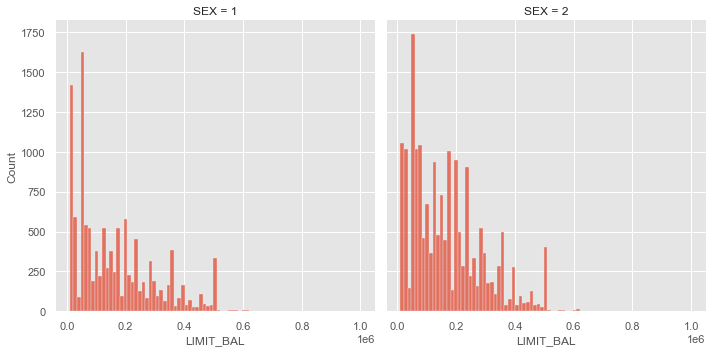

In [21]:
sns.displot(df, x = "LIMIT_BAL", col = "SEX", multiple = "dodge")

As you can see, the amount of the given credit (NT dollar) which includes both an individual consumer's credit and their family (supplementary) credit is approximately higher for women.

Secondly, let's show a distribution (density in our case) of the feature `LIMIT_BAL` for all four values of the variable `MARRIAGE` (`1` = married; `2` = single; `3` = others) with the help of the parameter `hue`.

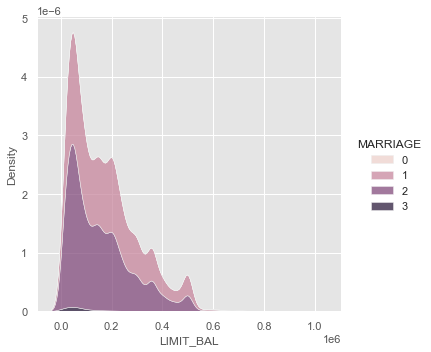

In [22]:
sns.displot(df, x = "LIMIT_BAL", hue = "MARRIAGE", kind = "kde", multiple = "stack")

As you can see, most of the clients are married with a high density of distribution. The group of single clients comes next. And the group of clients with another relationship state closes our distribution in the third place.

At the same time, we don't see a distribution with a state that is equal to `0`, perhaps, it's an outlier in our dataset.

In addition, we can use a “small-multiple” approach to visualize the univariate distribution of all the variables in our dataset along with all of their pairwise relationships by `PairGrid` method directly. It will afford more flexibility with only a bit more typing (for instance, for our four features: `SEX`, `EDUCATION`, `MARRIAGE`, `AGE`). This code might take some time to execute.

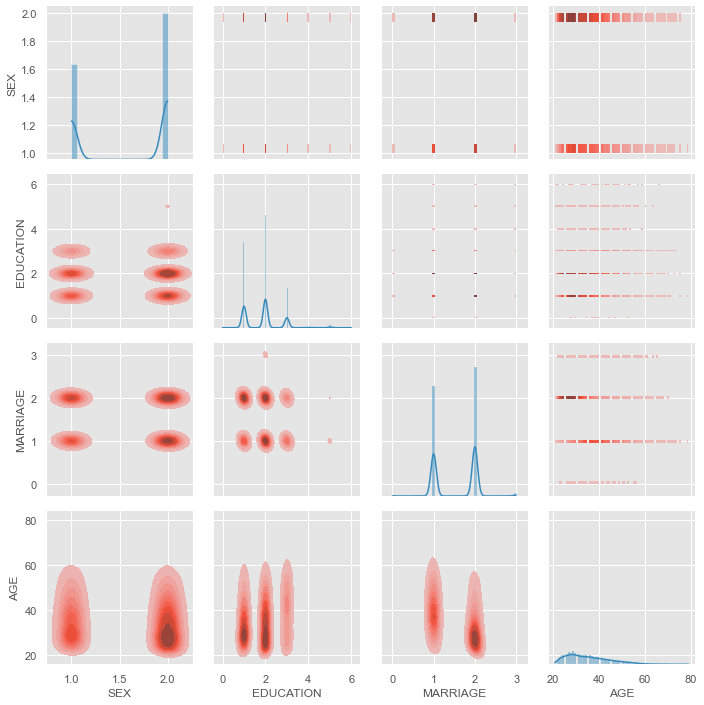

In [23]:
g = sns.PairGrid(df[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE']])
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

**For each feature, you can build a separate histogram, for instance, let's build it for the variable `AGE`**. Parameter `bins` (you can change it optionally) defines the number of equal-width bins in the range for our histogram.

<AxesSubplot:>

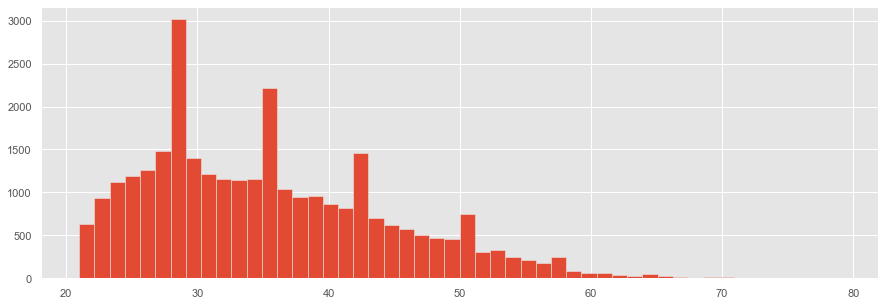

In [24]:
df["AGE"].hist(bins = 50)

The histogram shows that most of our clients are between the ages of (approximately) `21-22` and `44`, which corresponds to the actively working part of the population.


**Or you can build it for all together:**

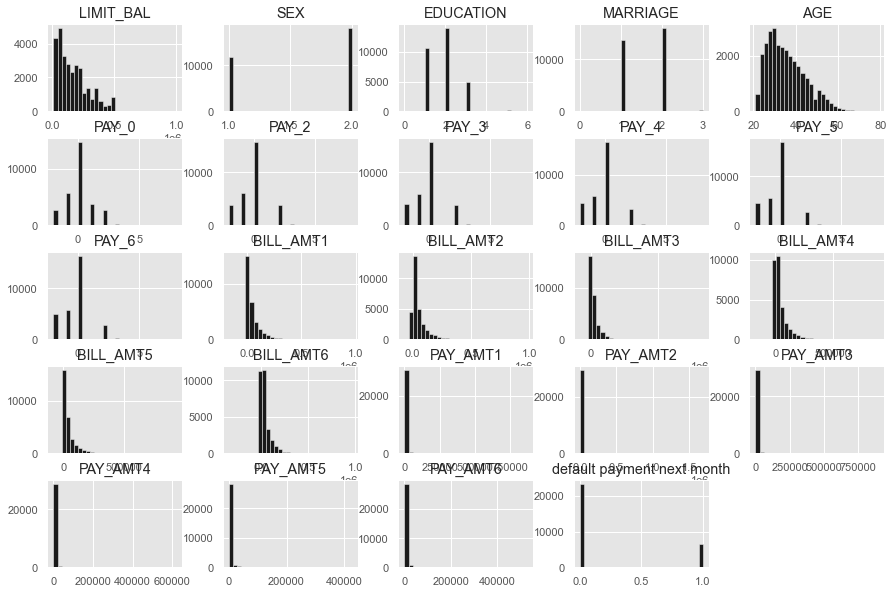

In [25]:
df.hist(color = "k",
        bins = 30,
        figsize = (15, 10))
plt.show()

A visual analysis of the histograms presented allows us to make preliminary assumptions about the variability of the source data.

[**Box Plot** ("Box and whisker plot")](https://seaborn.pydata.org/generated/seaborn.boxplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsPreliminary_data_analysis_dataset_L126905723-2022-01-01) is useful too. It allows you to compactly visualize the main characteristics of the feature distribution (the median, lower and upper quartile, minimal and maximum, outliers).
​
For instance, let's build a distribution of the variable `LIMIT_BAL` which depends on two other variables `EDUCATION` (`1` = graduate school; `2` = university; `3` = high school; `4` = others) and `SEX`.
​

<AxesSubplot:xlabel='EDUCATION', ylabel='LIMIT_BAL'>

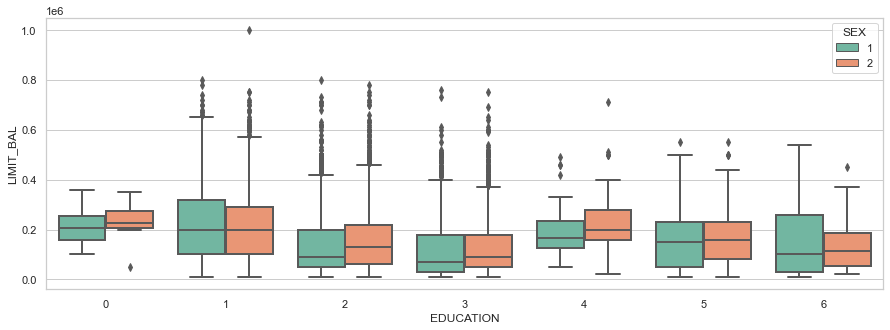

In [26]:
sns.set_theme(style = "whitegrid")
sns.boxplot(x = "EDUCATION",
                 y = "LIMIT_BAL",
                 hue = "SEX",
                 data = df,
                 linewidth = 2.0,
                 dodge = True,
                 palette = "Set2")

This plotting shows that people after a graduate school on average have a bigger amount of given credit (NT dollar) than those who have a university or a high school education. In addition, we can see that all the eduaction groups have outlier zones: over `0.5` for the first education level, and about `0.4` for the second and third levels.

**You can do this by data grouping on any other feature:**

<AxesSubplot:xlabel='MARRIAGE', ylabel='AGE'>

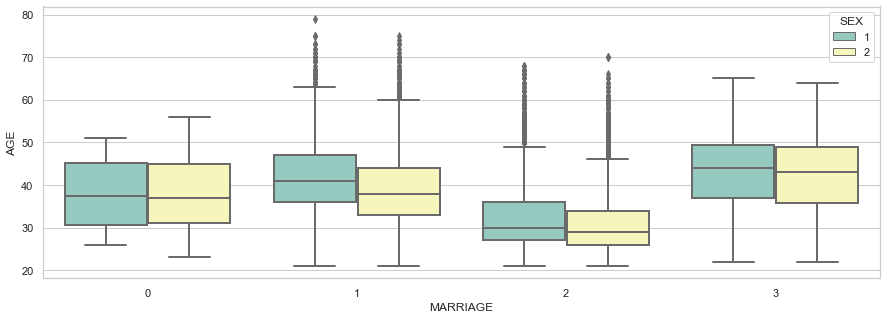

In [27]:
sns.boxplot(x = "MARRIAGE",
                 y = "AGE",
                 hue = "SEX",
                 data = df,
                 linewidth = 2.0,
                 dodge = True,
                 palette = "Set3")

## Tasks

### Question 1

Create a list of only 15 IDs of clients with the largest amount of previous payment (NT dollar) in September 2005 and indicate the average of this payment and the average age for these 15 clients.


In [28]:
df.sort_values(by = "PAY_AMT1", ascending = False)[["PAY_AMT1", "AGE"]].head(15).mean()

PAY_AMT1    381409.467
AGE             35.600
dtype: float64

### Question 2

Build an output box plot to analyze the clients' age distribution by their education level (`1` = graduate school; `2` = university; `3` = high school; `4` = others) and their marital status (`1` = married; `2` = single).

Which group has more observations:

1.  single with a high school education level or single with a graduate school education level?
2.  with a minimum number of outliers: married with a graduate school or university or high school education?
3.  where the average age is higher for all three education levels: for married or single clients?


<AxesSubplot:xlabel='EDUCATION', ylabel='AGE'>

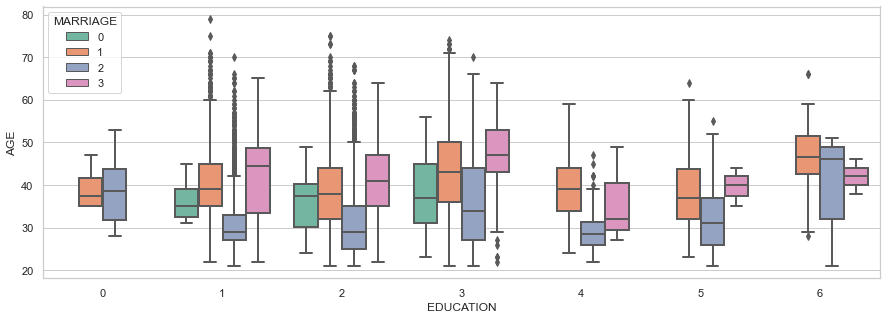

In [32]:
sns.boxplot(x = "EDUCATION",
                 y = "AGE",
                 hue = "MARRIAGE",
                 data = df,
                 linewidth = 2.0,
                 dodge = True,
                 palette = "Set2")

## Authors
**Sergii Kavun**